In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
raw_data = pd.read_csv('../DataSets/winequality-red.csv')

label =  np.unique(raw_data['quality'])
label

array([3, 4, 5, 6, 7, 8], dtype=int64)

# Pre-processing

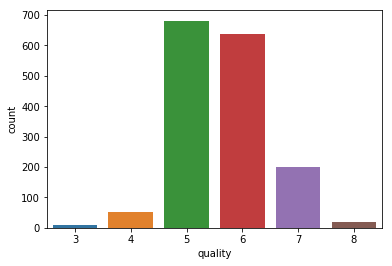

In [11]:
sns.countplot(raw_data['quality'])

### Most of the data belongs from 5th and 6th class

In [23]:
train_data = raw_data.iloc[ : int(raw_data.shape[0] * .75) , :]
test_data = raw_data.iloc[int(raw_data.shape[0] * .75) : , :]
train_data_labels = train_data['quality']
test_data_labels = test_data['quality']
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


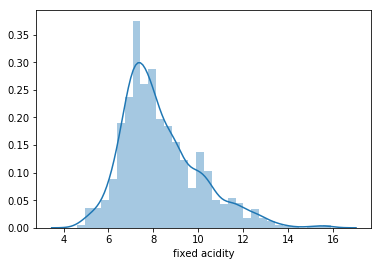

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


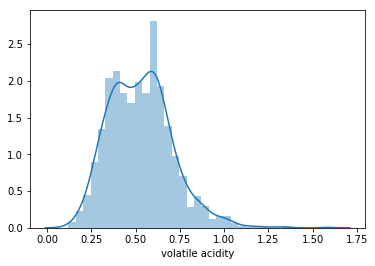

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


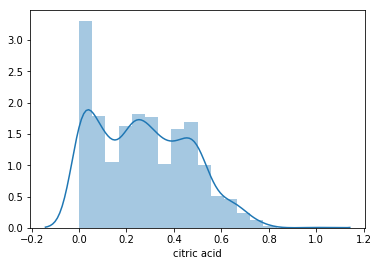

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


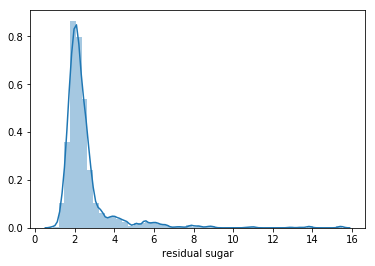

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


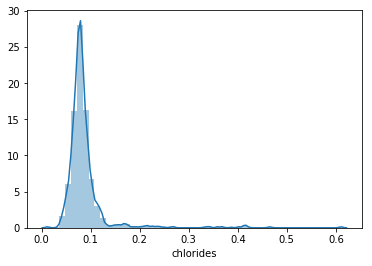

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


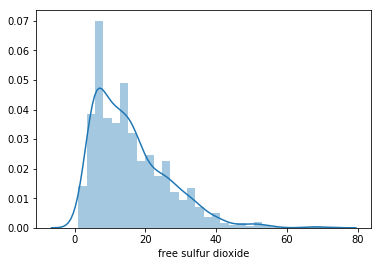

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


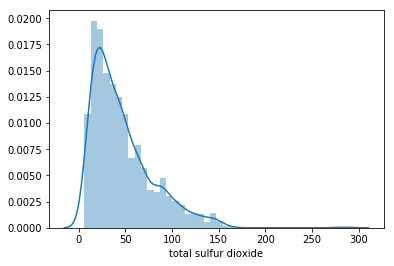

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


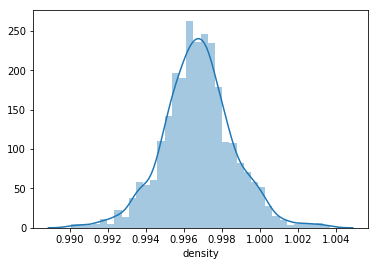

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


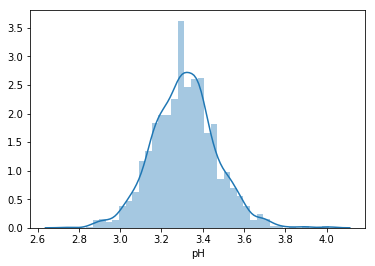

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


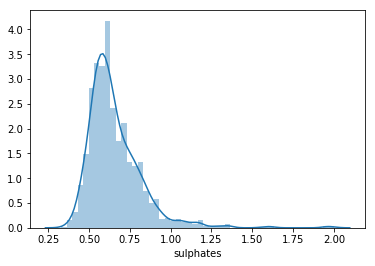

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


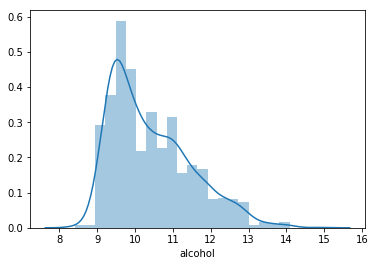

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


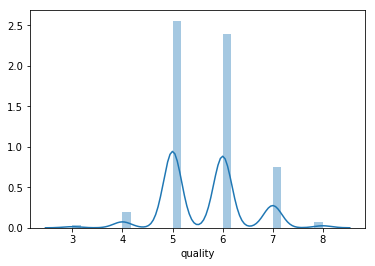

In [18]:
for i in raw_data:
    sns.distplot(raw_data[i])
    plt.show()

In [24]:
del train_data['quality'] , test_data['quality']

In [290]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11 )
pca.fit_transform(train_data)
np.argmax(pca.components_ , axis = 1 )

array([6, 5, 0, 3, 3, 9, 9, 1, 2, 4, 8], dtype=int64)

In [291]:
# 6 is the idices of train_data which tell us that it has highest variance and if PCA try to reduce the dimention than 
# it's first prefer choice is that idices feature of training data
pca = PCA(n_components = 5 )
pca.fit_transform(train_data)
np.argmax(pca.components_ , axis = 1 )


array([6, 5, 0, 3, 3], dtype=int64)

In [312]:
a , b = np.linalg.eig(train_data.cov())
pd.DataFrame(a,dtype=int)

train_data.var()

fixed acidity              3.174795
volatile acidity           0.032115
citric acid                0.038711
residual sugar             1.598812
chlorides                  0.002334
free sulfur dioxide      104.252399
total sulfur dioxide    1152.546649
density                    0.000004
pH                         0.024386
sulphates                  0.030948
alcohol                    1.192226
dtype: float64

In [272]:
# AX = lmda * X                          where A is 'traindata.cov()'    lmda is 'a'      X is 'b'
pd.DataFrame( b )                         #  eq ---- (1)

,0,1,2,3,4,5,6,7,8,9,10
0,0.008475,0.011992,0.972833,-0.187413,0.084386,-0.078614,-0.014595,-0.064693,-0.019379,0.013438,-0.000964
1,-0.000471,0.002585,-0.025683,0.000374,-0.039046,-0.670066,-0.484382,0.336094,0.440404,-0.085322,-0.000894
2,0.000023,0.002379,0.075812,-0.001501,0.041985,0.479143,0.259599,0.305006,0.767691,-0.114609,0.000143
3,-0.005964,0.002090,0.207647,0.888132,-0.409684,0.014110,-0.001328,-0.000805,-0.004554,-0.000982,-0.000448
4,-0.000027,0.000306,0.001095,-0.003540,-0.007827,0.072514,-0.104706,0.130131,0.084998,0.979558,-0.003202
5,-0.209956,-0.977448,0.013627,-0.009241,-0.015098,-0.000552,-0.000008,0.003462,0.001408,-0.000412,0.000008
6,-0.977638,0.209888,0.004238,-0.002502,0.012012,-0.000743,0.000234,-0.001385,-0.000720,0.000316,-0.000003
7,-0.000001,0.000022,0.000722,-0.000070,-0.000931,-0.000754,-0.001510,-0.003935,0.002850,0.003431,0.999980
8,0.000065,-0.003478,-0.059112,0.020691,0.005551,-0.164088,0.027421,-0.866899,0.456701,0.090784,-0.005058
9,-0.000226,-0.000744,0.019233,-0.004720,0.021120,0.529677,-0.828164,-0.145244,-0.011912,-0.107278,-0.001016


In [221]:
pd.DataFrame(np.matmul(train_data.cov() , b))   #eq ---- (2)


,0,1,2,3,4,5,6,7,8,9,10
0,10.198767,0.642714,3.101818,-0.295551,0.087669,-0.003262,-3.676443e-04,-0.000743,-0.000195,2.071470e-05,-5.489134e-10
1,-0.567173,0.138565,-0.081889,0.000589,-0.040565,-0.027804,-1.220106e-02,0.003862,0.004434,-1.315214e-04,-5.090713e-10
2,0.027602,0.127501,0.241722,-0.002366,0.043618,0.019882,6.539018e-03,0.003505,0.007729,-1.766672e-04,8.144409e-11
3,-7.177666,0.112035,0.662071,1.400591,-0.425624,0.000585,-3.346031e-05,-0.000009,-0.000046,-1.513895e-06,-2.548436e-10
4,-0.032445,0.016395,0.003491,-0.005583,-0.008131,0.003009,-2.637420e-03,0.001495,0.000856,1.509965e-03,-1.823322e-09
5,-252.662376,-52.384804,0.043449,-0.014574,-0.015686,-0.000023,-2.022044e-07,0.000040,0.000014,-6.347793e-07,4.351972e-12
6,-1176.494743,11.248635,0.013513,-0.003945,0.012480,-0.000031,5.897840e-06,-0.000016,-0.000007,4.873431e-07,-1.484603e-12
7,-0.001430,0.001197,0.002303,-0.000110,-0.000967,-0.000031,-3.803950e-05,-0.000045,0.000029,5.288170e-06,5.693434e-07
8,0.077660,-0.186393,-0.188474,0.032631,0.005767,-0.006809,6.907074e-04,-0.009962,0.004598,1.399406e-04,-2.879565e-09
9,-0.271890,-0.039849,0.061322,-0.007443,0.021941,0.021979,-2.086057e-02,-0.001669,-0.000120,-1.653662e-04,-5.782444e-10


In [262]:
# equation (1) = (2)
np.argmax(b , axis = 1) # 0,  6,  0,  3, 10,  9,  2,  1,  2,  4,  7
pd.DataFrame(b)

,0,1,2,3,4,5,6,7,8,9,10
0,0.008475,0.011992,0.972833,-0.187413,0.084386,-0.078614,-0.014595,-0.064693,-0.019379,0.013438,-0.000964
1,-0.000471,0.002585,-0.025683,0.000374,-0.039046,-0.670066,-0.484382,0.336094,0.440404,-0.085322,-0.000894
2,0.000023,0.002379,0.075812,-0.001501,0.041985,0.479143,0.259599,0.305006,0.767691,-0.114609,0.000143
3,-0.005964,0.002090,0.207647,0.888132,-0.409684,0.014110,-0.001328,-0.000805,-0.004554,-0.000982,-0.000448
4,-0.000027,0.000306,0.001095,-0.003540,-0.007827,0.072514,-0.104706,0.130131,0.084998,0.979558,-0.003202
5,-0.209956,-0.977448,0.013627,-0.009241,-0.015098,-0.000552,-0.000008,0.003462,0.001408,-0.000412,0.000008
6,-0.977638,0.209888,0.004238,-0.002502,0.012012,-0.000743,0.000234,-0.001385,-0.000720,0.000316,-0.000003
7,-0.000001,0.000022,0.000722,-0.000070,-0.000931,-0.000754,-0.001510,-0.003935,0.002850,0.003431,0.999980
8,0.000065,-0.003478,-0.059112,0.020691,0.005551,-0.164088,0.027421,-0.866899,0.456701,0.090784,-0.005058
9,-0.000226,-0.000744,0.019233,-0.004720,0.021120,0.529677,-0.828164,-0.145244,-0.011912,-0.107278,-0.001016


In [259]:
np.argmax(a*b , axis= 0)

array([ 0,  6,  0,  3, 10,  9,  2,  1,  2,  4,  7], dtype=int64)